In [1]:
import re

In [286]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\ml_classi\spam_ham_dataset.csv\spam_ham_dataset.csv")

In [4]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
data.drop(columns=["Unnamed: 0","label"],inplace=True)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
# cleaning text data 

In [9]:
data ["len_text"] = data["text"].apply(len)

In [10]:
data.head()

,text,label_num,len_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [11]:
data.groupby("label_num")["len_text"].mean()

label_num
0     994.939394
1    1249.326265
Name: len_text, dtype: float64

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt 

<Axes: xlabel='len_text', ylabel='Count'>

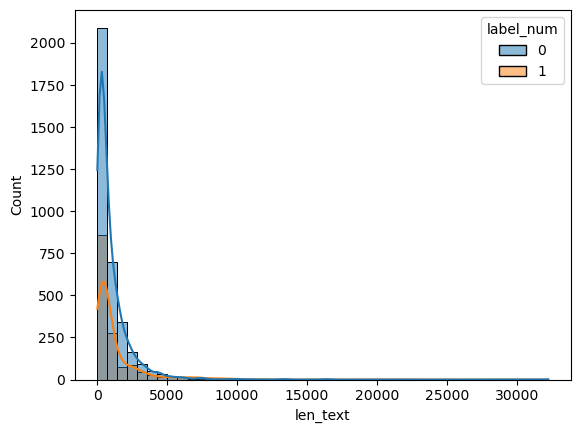

In [13]:
sns.histplot(data = data ,x = "len_text",kde = True ,bins = 45,hue = "label_num")

In [14]:
data.head()

,text,label_num,len_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [15]:
data.head()

,text,label_num,len_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336


In [16]:
# clean the text using re library 

In [17]:
  # text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Step 1
  # text = text.lower()                         # Step 2
  # text = text.strip()                         # Step 3

In [18]:
print(re.sub(r"[^a-zA-Z0-9\s]","","Hello!!! Python_2025 🚀🔥"))

Hello Python2025 


In [19]:
text_1 = "   Hello Python2025 "
print(text_1.lower())

   hello python2025 


In [20]:
print(text_1.upper())

   HELLO PYTHON2025 


In [21]:
print(text_1.strip())

Hello Python2025


In [22]:
print(text_1.split())

['Hello', 'Python2025']


In [190]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [218]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    words = text.split()
    words = [w for w in words if w not in stop_words]
    text = " ".join(words)
    return text

In [236]:
data["text"][5]

'subject ehronline web address change\r\nthis message is intended for ehronline users only \r\ndue to a recent change to ehronline  the url  aka  web address   for accessing ehronline needs to be changed on your computer  the change involves adding the letter  s  to the  http  reference in the url  the url for accessing ehronline should be  https    ehronline  enron  com \r\nthis change should be made by those who have added the url as a favorite on the browser'

In [240]:
sample = 'subject ehronline web address change\r\nthis message is intended for ehronline users only \r\ndue to a recent change to ehronline  the url  aka  web address   for accessing ehronline needs to be changed on your computer  the change involves adding the letter  s  to the  http  reference in the url  the url for accessing ehronline should be  https    ehronline  enron  com \r\nthis change should be made by those who have added the url as a favorite on the browser'


In [242]:
print(clean_text(sample))

subject ehronline web address change message intended ehronline users due recent change ehronline url aka web address accessing ehronline needs changed computer change involves adding letter http reference url url accessing ehronline https ehronline enron com change made added url favorite browser


In [204]:
data["text"][1]

'subject hpl nom for january 9  2001\r\n see attached file  hplnol 09  xls \r\n hplnol 09  xls'

In [248]:
data["text"] = data["text"].apply(clean_text)

In [252]:
data.head()

,text,label_num,len_text
0,subject enron methanol meter 988291 follow not...,0,327
1,subject hpl nom january 9 2001 see attached fi...,0,97
2,subject neon retreat ho ho ho around wonderful...,0,2524
3,subject photoshop windows office cheap main tr...,1,414
4,subject indian springs deal book teco pvr reve...,0,336


In [595]:
data[data["label_num"]==1]["text"]

3       subject photoshop windows office cheap main tr...
7       subject looking medication best source difficu...
10      subject vocable rnd word asceticism vcsc brand...
11      subject report 01405 wffur attion brom est ins...
13      subject vic odin n ow berne hotbox carnal brid...
                              ...                        
5159    subject pictures streamlined denizen ajar chas...
5161    subject penny stocks timing nomad internationa...
5162    subject anomaly boys 3881 uosda apaproved mled...
5164       subject slutty milf wants meet take ilaa liqaa
5170    subject important online banking alert dear va...
Name: text, Length: 1462, dtype: object

In [601]:
data["text"][11]

'subject report 01405 wffur attion brom est inst siupied 1 pgst riwe asently rest tont presyou tew cons benco 4 yee fater 45 ust lyughtatums inenced sorepit grathers aicy graghteave allarity oarity wow yur coons 60 mers oite ithat yoit berst thar enth excives 2004'

In [256]:
# we clean the text data 

<Axes: xlabel='len_text', ylabel='Count'>

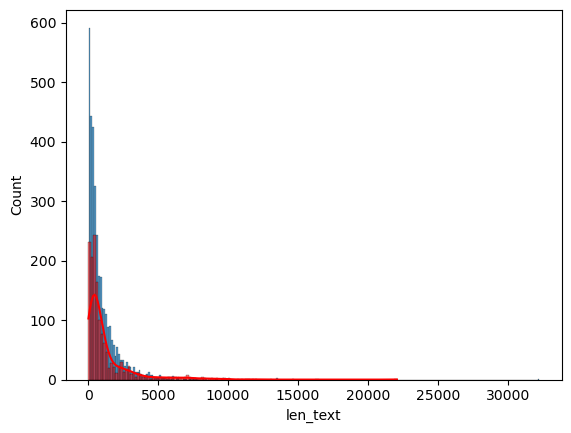

In [258]:
sns.histplot(data[data["label_num"]==0]["len_text"])
sns.histplot(data[data["label_num"]==1]["len_text"],color="red",kde = True)

In [260]:
data[["label_num","len_text"]].corr()

,label_num,len_text
label_num,1.000000,0.074794
len_text,0.074794,1.000000


<Axes: >

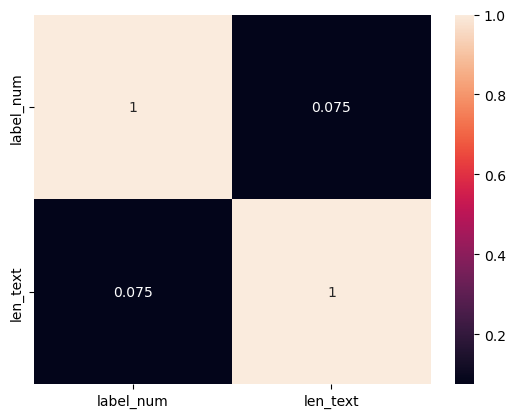

In [262]:
# weake corr
sns.heatmap(data[["label_num","len_text"]].corr(),annot=True)

In [264]:
from wordcloud import WordCloud,STOPWORDS

In [266]:
wc = WordCloud(width=500,height=500,min_font_size=10 ,background_color="white")

In [268]:
ham_text = " ".join(data[data['label_num'] == 0]['text'])
spam_text = " ".join(data[data['label_num'] == 1]['text'])

ham_wordcloud = WordCloud(width=800, height=500, background_color='white').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=500, background_color='white').generate(spam_text)


<function matplotlib.pyplot.show(close=None, block=None)>

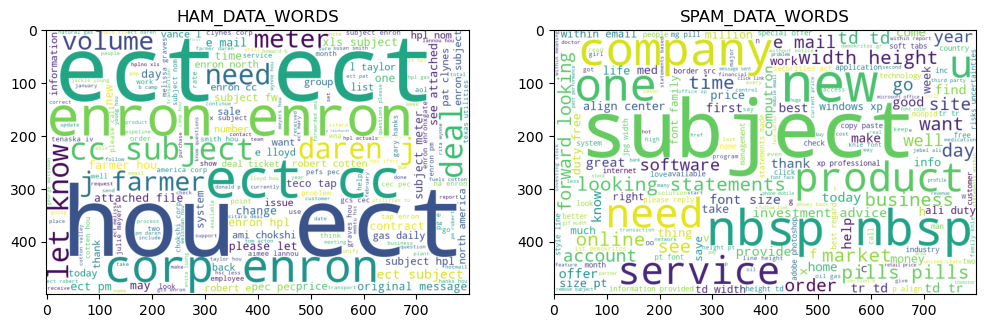

In [272]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.imshow(ham_wordcloud)
plt.title("HAM_DATA_WORDS")
plt.subplot(1,2,2)
plt.imshow(spam_wordcloud)
plt.title("SPAM_DATA_WORDS")
plt.show

In [311]:
from sklearn.model_selection import train_test_split
from  sklearn.linear_model import LogisticRegression

In [377]:
x = data["text"]

In [379]:
x.ndim,x.shape

(1, (4993,))

In [381]:
y = data["label_num"]

In [383]:
y.shape

(4993,)

In [385]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [387]:
x_train.shape,x_test.shape

((3994,), (999,))

In [389]:
y_train.shape,y_test.shape

((3994,), (999,))

In [391]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [393]:
tfid = TfidfVectorizer()
pipe = Pipeline

In [395]:
spam_clf = pipe([
    ("tfid",TfidfVectorizer()),
    ("logestic",LogisticRegression(max_iter=1000))
])

In [397]:
spam_clf

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('logestic', LogisticRegression(max_iter=1000))])

In [399]:
spam_clf.fit(x_train,y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()),
                ('logestic', LogisticRegression(max_iter=1000))])

In [401]:
data.head()

,text,label_num,len_text
0,subject enron methanol meter 988291 follow not...,0,327
1,subject hpl nom january 9 2001 see attached fi...,0,97
2,subject neon retreat ho ho ho around wonderful...,0,2524
3,subject photoshop windows office cheap main tr...,1,414
4,subject indian springs deal book teco pvr reve...,0,336


In [403]:
data["text"][3]

'subject photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin'

In [409]:
spam_clf.predict(['subject photoshop windows office cheap main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin'])

array([1], dtype=int64)

In [431]:
score = spam_clf.score(x_test,y_test)
print("LogisticRegression Model score :",score)

LogisticRegression Model score : 0.984984984984985


In [417]:
y_true = spam_clf.predict(x_test)

In [509]:
from sklearn.metrics import confusion_matrix,precision_score

In [511]:
cm = confusion_matrix(y_true,y_test)
print(cm)
pr = precision_score(y_true,y_test)
print(pr)

[[721   4]
 [ 11 263]]
0.9850187265917603


# we use spam_clf as our prediction model

In [579]:
import pickle

In [581]:
pickle.dump(spam_clf,open ("spam_clf_model.pkl","wb"))

<Axes: >

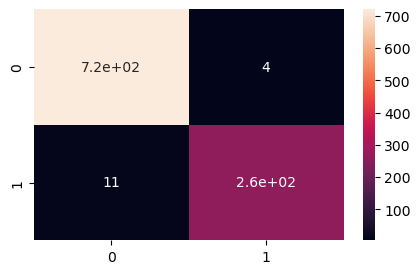

In [437]:
plt.figure(figsize=(5,3))
sns.heatmap(cm,annot=True)

#  Try More ml Models

In [ ]:
# here we use the navies bayes model --multinomial()

In [441]:
from sklearn.naive_bayes import MultinomialNB 

In [558]:
tfid = TfidfVectorizer(max_features=6000)

In [560]:
xx= tfid.fit_transform(data["text"]).toarray()
yy = data["label_num"].values

In [562]:
navies = MultinomialNB()

In [564]:
x_new_train ,x_new_test,y_new_train,y_new_test = train_test_split(xx,yy,random_state=42,test_size=0.2)

In [566]:
y_new_test.shape

(999,)

In [568]:
navies.fit(x_new_train,y_new_train)

MultinomialNB()

In [570]:
navies.score(x_new_test,y_new_test)

0.963963963963964

In [572]:
y_new_true = navies.predict(x_new_test)

In [574]:
confusion_matrix(y_new_true,y_new_test)

array([[708,  12],
       [ 24, 255]], dtype=int64)

In [576]:
pr = precision_score(y_new_true,y_new_test)
print("precision score multinomial:",pr)

precision score multinomial: 0.9550561797752809
